<a href="https://colab.research.google.com/github/eduardosousa1992/Trabalhando_com_dados_Netflix/blob/main/Listando_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dados = pd.read_csv('netflix_titles.csv')

In [5]:
dados

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
from scipy.special import comb

In [10]:
dados.columns = ["show_id", "Modelo", "Título", "Diretor", "Elenco", "País", "Data_Adicionado", "Ano_de_lançamento","Avaliação", "Duração", "Listados_em", "Descrição"]

In [11]:
dados.head()

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
dados["Título"]

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: Título, Length: 7787, dtype: object

In [18]:
dados["Título"].unique()

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [19]:
dados.País

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: País, Length: 7787, dtype: object

In [22]:
dados["País"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [26]:
dados["País"].value_counts()

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
United Kingdom, United States, Japan         1
Bulgaria, United States, Spain, Canada       1
Germany, Czech Republic                      1
Bulgaria                                     1
Singapore, Japan, France                     1
Name: País, Length: 681, dtype: int64

In [30]:
dados["Ano_de_lançamento"].mean()

2013.932579940927

In [31]:
dados["Ano_de_lançamento"]

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: Ano_de_lançamento, Length: 7787, dtype: int64

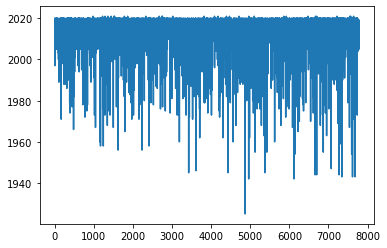

In [32]:
dados.Ano_de_lançamento.plot()

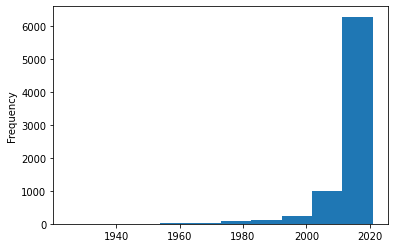

In [33]:
dados.Ano_de_lançamento.plot(kind='hist')

In [34]:
dados.sample(3)

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
5652,s5653,Movie,Sky Ladder: The Art of Cai Guo-Qiang,Kevin MacDonald,Cai Guo-Qiang,United States,"October 14, 2016",2016,TV-MA,80 min,Documentaries,Known for his spectacular pyrotechnic displays...
7351,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",2011,PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...
3096,s3097,Movie,Jack and the Cuckoo-Clock Heart,"Mathias Malzieu, Stéphane Berla","Orlando Seale, Samantha Barks, Harry Sadeghi, ...","France, Belgium","February 8, 2017",2013,PG,93 min,"Children & Family Movies, Music & Musicals",Equipped with a mechanical heart and determine...


In [36]:
cnt_tmp = dados.groupby('Modelo')['Ano_de_lançamento'].value_counts().unstack().fillna(0).astype(int).T
movie_count, tvshow_count = cnt_tmp['Movie'], cnt_tmp['TV Show']

In [37]:
cnt_tmp

Modelo,Movie,TV Show
Ano_de_lançamento,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,0
...,...,...
2017,744,268
2018,734,387
2019,582,414


In [41]:
movie_count = dados[dados['Modelo']=='Movie']['Ano_de_lançamento'].value_counts().sort_index()

In [42]:
movie_count

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    744
2018    734
2019    582
2020    411
2021     12
Name: Ano_de_lançamento, Length: 72, dtype: int64

In [44]:
tvshow_count = dados[dados['Modelo']=='TV Show']['Ano_de_lançamento'].value_counts().sort_index()

In [45]:
tvshow_count

1925      1
1946      1
1963      1
1967      1
1968      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      2
1993      4
1994      1
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      4
2002      6
2003      9
2004      9
2005     12
2006     13
2007     13
2008     23
2009     34
2010     37
2011     39
2012     61
2013     65
2014     90
2015    159
2016    240
2017    268
2018    387
2019    414
2020    457
2021     19
Name: Ano_de_lançamento, dtype: int64

In [47]:
print ("Media", dados["Ano_de_lançamento"].mean())
print ("Mediana", dados["Ano_de_lançamento"].median())

Media 2013.932579940927
Mediana 2017.0


In [48]:
dados.Ano_de_lançamento.describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: Ano_de_lançamento, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


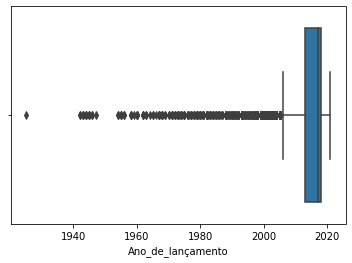

In [49]:
sns.boxplot(dados.Ano_de_lançamento)

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


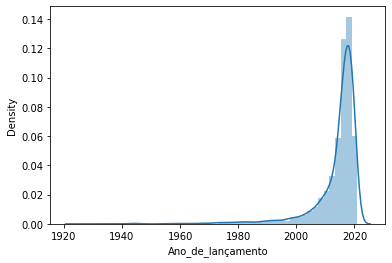

In [52]:
sns.distplot(dados.Ano_de_lançamento)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


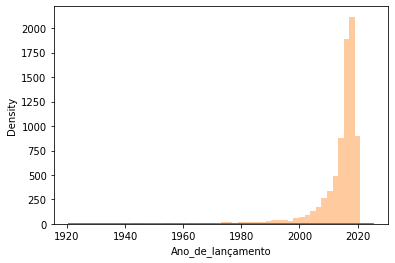

In [53]:
sns.distplot(dados.Ano_de_lançamento)
sns.distplot(dados.Ano_de_lançamento, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


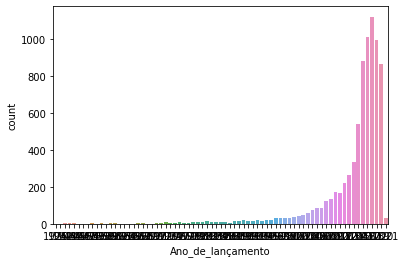

In [54]:

sns.countplot(dados.Ano_de_lançamento)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


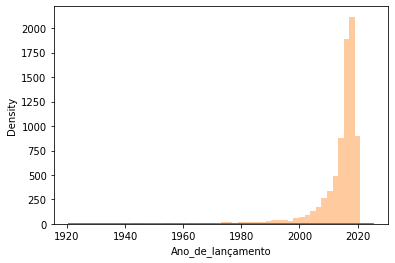

In [59]:
sns.distplot(dados.Ano_de_lançamento)
sns.distplot(dados.Ano_de_lançamento, kde=False)

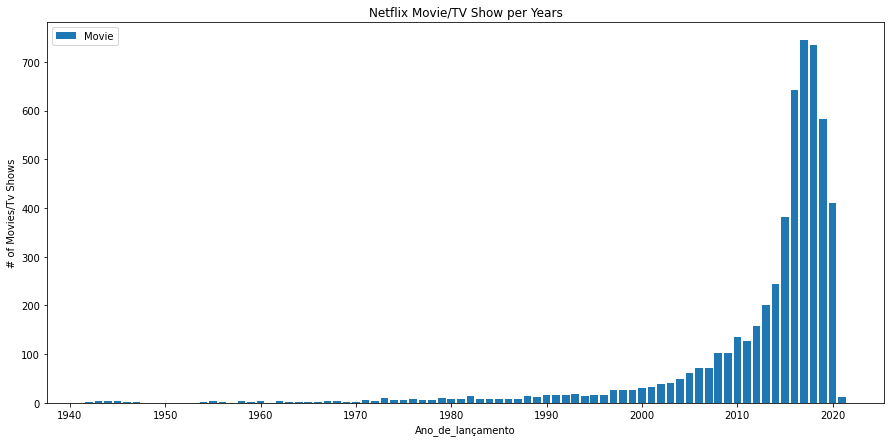

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.bar(movie_count.index, movie_count, label='Movie') # Label for legend
ax.set_title('Netflix Movie/TV Show per Years') # Título
ax.set_xlabel('Ano_de_lançamento') # Label
ax.set_ylabel('# of Movies/Tv Shows')
ax.legend() # Legend
plt.show()

Text(0.5, 0.5, 'Default')

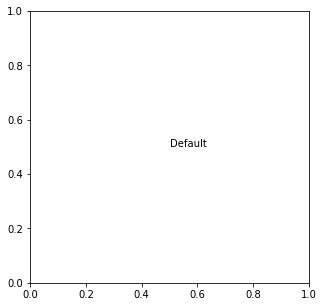

In [64]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.text(0.5, 0.5, s='Default')

In [66]:
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
ax.set_xticks([])
ax.set_yticks([])
plt.show()

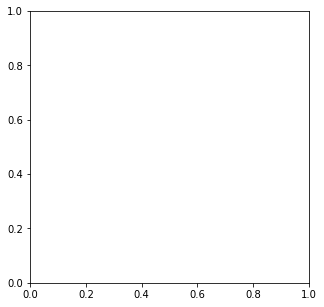

In [69]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

In [70]:
for idx, size in enumerate( ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'], 1):
    ax.text(0.5, 1-0.12*idx, size,
           size=size)

In [72]:
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)

In [73]:
ax.set_xticks([])
ax.set_yticks([])
plt.show()

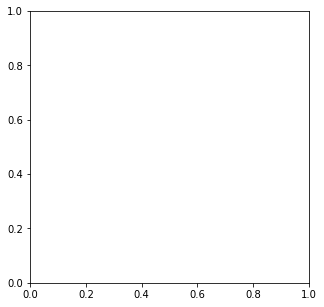

In [74]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

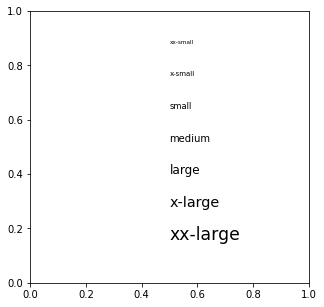

In [81]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for idx, size in enumerate( ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'], 1):
    ax.text(0.5, 1-0.12*idx, size,
           size=size)

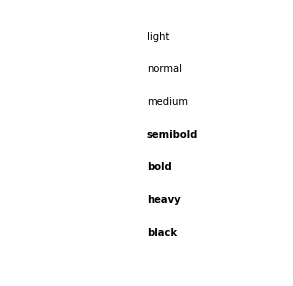

In [79]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for idx, weight in enumerate(['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'], 1):
    ax.text(0.5, 1-0.12*idx, weight,
           weight=weight)


for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
ax.set_xticks([])
ax.set_yticks([])
plt.show()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


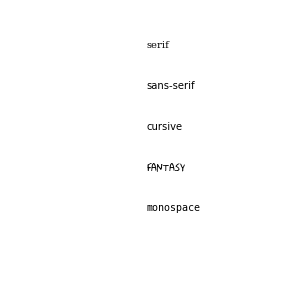

In [78]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for idx, family in enumerate(['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'], 1):
    ax.text(0.5, 1-0.15*idx, family,
           family=family)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
ax.set_xticks([])
ax.set_yticks([])
plt.show()

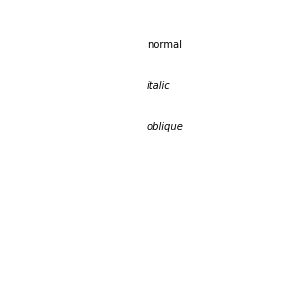

In [83]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for idx, style in enumerate(['normal', 'italic', 'oblique'], 1):
    ax.text(0.5, 1-0.15*idx, style,
           style=style)

for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(False)
    
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Conjunto de dados 

In [84]:
dados.shape

(7787, 12)

Verificando os valores nulos e ausentes

In [86]:
dados.isnull().sum()

show_id                 0
Modelo                  0
Título                  0
Diretor              2389
Elenco                718
País                  507
Data_Adicionado        10
Ano_de_lançamento       0
Avaliação               7
Duração                 0
Listados_em             0
Descrição               0
dtype: int64

Comparação de programas de TV e filmes


In [99]:
dados_df = pd.DataFrame()
dados_df

""


In [115]:
movies_count = dados[dados.Modelo == "Movie"]
tvshows_count = dados[dados["Modelo"] == "TV Show"]

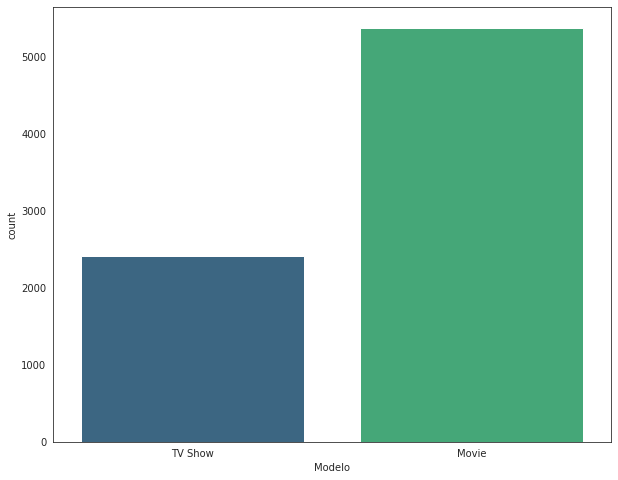

In [117]:
plt.figure(figsize=(10,8))
sns.set_style("white")
sns.countplot(x="Modelo", data=dados, palette="viridis")

In [118]:
dados

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [125]:
dados_counts = dados.País.value_counts()
dados_counts

United States                             2555
India                                      923
United Kingdom                             397
Japan                                      226
South Korea                                183
                                          ... 
United Kingdom, United States, Japan         1
Bulgaria, United States, Spain, Canada       1
Germany, Czech Republic                      1
Bulgaria                                     1
Singapore, Japan, France                     1
Name: País, Length: 681, dtype: int64

In [132]:
dados_diretor = dados.dropna(subset=["Diretor"])

In [133]:
dados_diretor

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [135]:
dados_diretor_counts = dados_diretor.Diretor.value_counts()
dados_diretor_counts

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Felipe Cano                1
Erik White                 1
Roman Gackowski            1
Ramesh Talwar              1
Richard Sears              1
Name: Diretor, Length: 4049, dtype: int64

Conteúdo anual lançado na netflix


In [141]:
conteudo_por_ano = dados.Ano_de_lançamento.value_counts().index[:20]
conteudo_por_ano

Int64Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011,
            2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2001],
           dtype='int64')

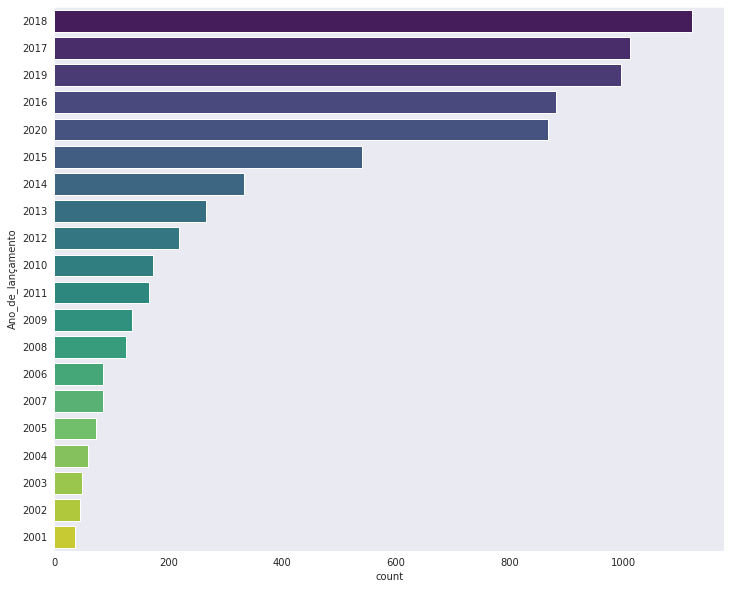

In [142]:
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.countplot(data=dados, y="Ano_de_lançamento", order=conteudo_por_ano, palette="viridis")

Convertendo todos os valores da string de duração em inteiros

In [146]:
movies_count['Duração']=movies_count['Duração'].str.replace(' min','')
movies_count['Duração']=movies_count['Duração'].astype(str).astype(int)
movies_count['Duração']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: Duração, Length: 5377, dtype: int64

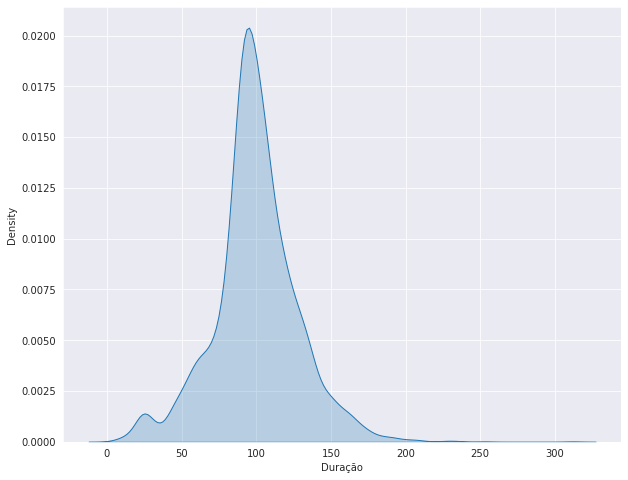

In [147]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.kdeplot(data=movies_count["Duração"], shade=True)

Conteúdo **Indiano** na Netflix 

Filtrando o País India

In [150]:
dados_india = dados[dados.País == "India"]
dados_india.head()

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."


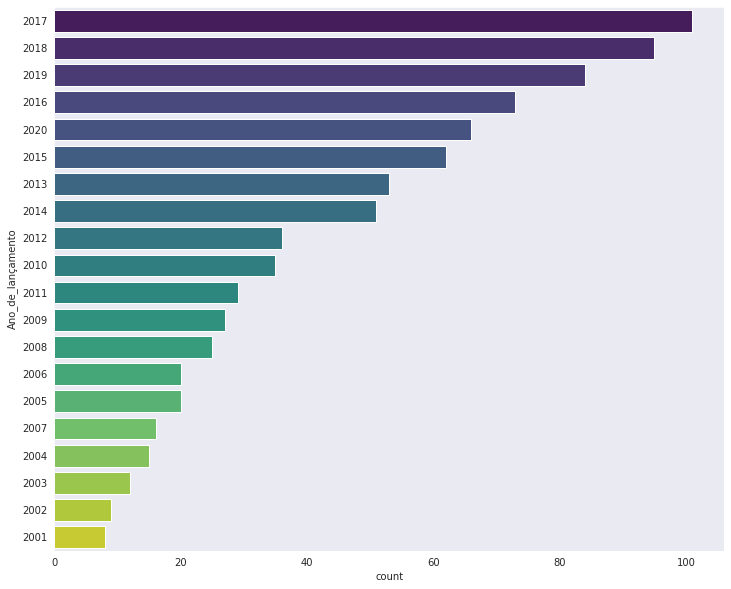

In [151]:
plt.figure(figsize=(12,10))
sns.set_style("dark")
sns.countplot(data=dados_india, y="Ano_de_lançamento", 
              order=dados_india.Ano_de_lançamento.value_counts().index[:20], 
              palette="viridis")

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [154]:
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [155]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [160]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7787 non-null   object
 1   Modelo             7787 non-null   object
 2   Título             7787 non-null   object
 3   Diretor            5398 non-null   object
 4   Elenco             7069 non-null   object
 5   País               7280 non-null   object
 6   Data_Adicionado    7777 non-null   object
 7   Ano_de_lançamento  7787 non-null   int64 
 8   Avaliação          7780 non-null   object
 9   Duração            7787 non-null   object
 10  Listados_em        7787 non-null   object
 11  Descrição          7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Text(0.5, 1.0, 'O tipo de nossos dados')

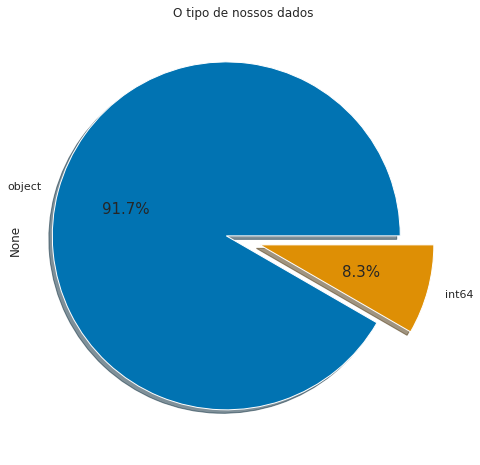

In [162]:
dados.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('O tipo de nossos dados')

In [163]:
dados.columns

Index(['show_id', 'Modelo', 'Título', 'Diretor', 'Elenco', 'País',
       'Data_Adicionado', 'Ano_de_lançamento', 'Avaliação', 'Duração',
       'Listados_em', 'Descrição'],
      dtype='object')

In [164]:
dados.describe(include='all')

,show_id,Modelo,Título,Diretor,Elenco,País,Data_Adicionado,Ano_de_lançamento,Avaliação,Duração,Listados_em,Descrição
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s3560,Movie,The Break,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN



encontrando valores **ausentes**

In [165]:
missing_values=dados.isnull().sum()
percent_missing = dados.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
show_id,0,NaN
Modelo,0,NaN
Título,0,NaN
Diretor,2389,inf
Elenco,718,inf
País,507,inf
Data_Adicionado,10,inf
Ano_de_lançamento,0,NaN
Avaliação,7,inf
Duração,0,NaN


In [166]:
dados.shape

(7787, 12)

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: Avaliação, dtype: int64


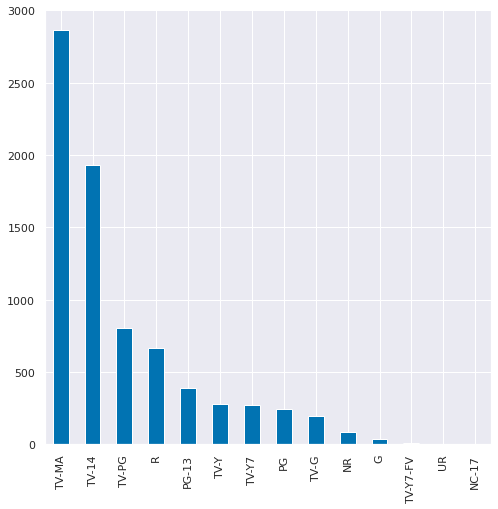

In [169]:
freq_value=dados.Avaliação.value_counts()
print(freq_value)
freq_value.plot.bar()

In [171]:
freq_rating=dados.Avaliação.mode()

In [174]:
dados['Avaliação'].fillna(dados['Avaliação'].mode,inplace=True)

In [175]:
dados.Avaliação.isnull().sum()

0

*Pesquisa pela data que foi adicionado**

In [180]:
freq_data=dados.Data_Adicionado.value_counts()
freq_data

January 1, 2020      118
November 1, 2019      94
March 1, 2018         76
December 31, 2019     76
October 1, 2018       72
                    ... 
 April 20, 2017        1
December 4, 2015       1
May 13, 2019           1
October 25, 2015       1
 April 16, 2019        1
Name: Data_Adicionado, Length: 1565, dtype: int64

In [181]:
dados=dados.dropna(axis=0, subset=['Data_Adicionado'])

In [182]:
dados.Data_Adicionado.isnull().sum()

0

**Por Países**

In [184]:
dados.País.value_counts()

United States                             2549
India                                      923
United Kingdom                             396
Japan                                      225
South Korea                                183
                                          ... 
United Kingdom, United States, Japan         1
Bulgaria, United States, Spain, Canada       1
Germany, Czech Republic                      1
Bulgaria                                     1
Singapore, Japan, France                     1
Name: País, Length: 681, dtype: int64

In [189]:
plt.figure(figsize=(15,8))
País_val=dados.País.value_counts().head(15)
sns.barplot(País.index,País)
plt.xticks(rotation=45)
plt.title('Conteúdo disponível em diferentes países')

NameError: ignored

<Figure size 1080x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'conteúdo disponível em diferentes países')

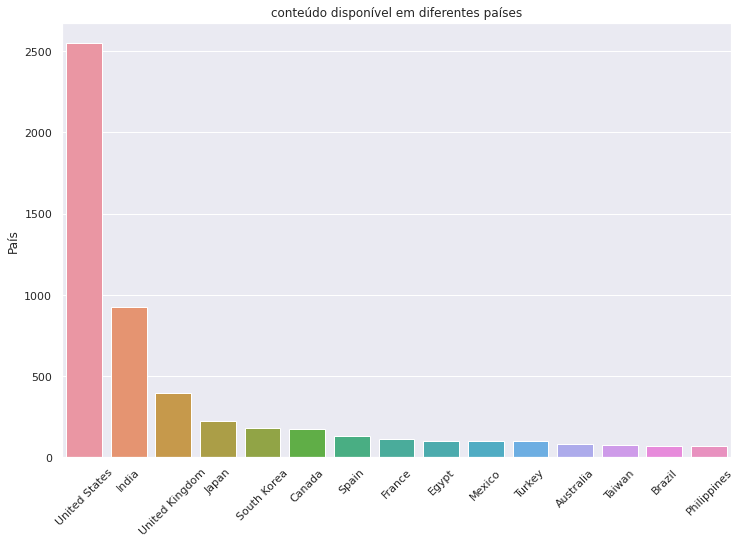

In [192]:
plt.figure(figsize=(12,8))
País=dados.País.value_counts().head(15)
sns.barplot(País.index,País)
plt.xticks(rotation=45)
plt.title('conteúdo disponível em diferentes países')

In [193]:
dados.País.mode()

0    United States
dtype: object

In [195]:
dados['País'].fillna(dados['País'].mode,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
dados.País.isnull().sum()

0

Pesquisa por **elenco**

In [199]:
dados.Elenco.value_counts().count()

6821

In [200]:
dados=dados.dropna(axis=0, subset=['Elenco'])

In [201]:
dados.isnull().sum()

show_id                 0
Modelo                  0
Título                  0
Diretor              2080
Elenco                  0
País                    0
Data_Adicionado         0
Ano_de_lançamento       0
Avaliação               0
Duração                 0
Listados_em             0
Descrição               0
dtype: int64

In [202]:
dados.Diretor.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Moataz El Tony             1
Kunal Kohli                1
Johan Brisinger            1
Gene Quintano              1
Richard Sears              1
Name: Diretor, Length: 3711, dtype: int64

Tipo de conteúdo no **Netflix**

In [205]:
col = "Modelo"
grouped = dados[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [213]:
d1 = dados[dados["Modelo"] == "TV Show"]
d2 = dados[dados["Modelo"] == "Movie"]

col = "Ano_de_lançamento"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Conteúdo adicionado ao longo dos anos", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Ano de lançamento original dos **filmes**

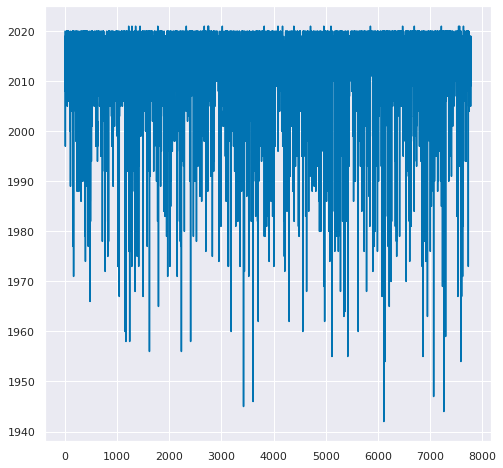

In [216]:
matplotlib.pyplot.plot(dados.Ano_de_lançamento)